Enunciado del ejercicio
1. (2 punto) Genera una base de datos con SQL Lite. En lugar de SQL Lite puedes utilizar Docker.
2. (2 punto) Conecta a esa base de datos con pyodbc o SQL Alchemy. Crea una tabla en la base de datos desde un data frame de pandas creado a partir de los datos del fichero big_bang_theory_dataset.csv que hay en el aula virtual.
3. (2 punto) Realiza un histograma con las localizaciones donde Sheldon dice exclusivamente “Penny.”. Representa junto al anterior histograma otro con las localizaciones donde Sheldon dice algún
 texto que contenga “Penny” (podrías utilizar el método de pandas Series.str.contains).
4. (2 punto) Usando matplotlib. Representa las localizaciones de la escena en el eje Y y el personaje que habla en el eje X.
5. (2 punto) Agrupa el conjunto de datos por la temporada y el personaje. Para cada grupo genera una columna con el número de veces que se pronuncia la palabra “Penny” y otra columna con un índice para el grupo creado por personaje y temporada (podrías utilizar el método de pandas ngroup). Usando sklearn, realiza una regresión logística que relacione


In [1]:
# leer el data frame
import os
import pandas as pd

# Get the current working directory
cwd = os.getcwd()

# Define the relative path to the csv file
csv_path = os.path.join(cwd, 'data', 'big_bang_theory_dataset.csv')

# Load the csv file into a pandas dataframe
df = pd.read_csv(csv_path)

# get the relative address
print(os.getcwd())

# show the first 5 rows of the dataframe
df.head()

c:\git\Python\python\Estudio\Data Science\Intro-python\Modulo2


,Unnamed: 0,Location,Scene,Text,Speaker,Season
0,0,The apartment,NaN,Again I’m right here.,Leonard,3
1,1,The apartment,NaN,Fine. The record shall so reflect. Now getting...,Sheldon,5
2,2,The room in the basement,"Sheldon enters, takes out a box, takes a bean...",One two three four five six seven eight… Drat....,Sheldon,6
3,3,Sheldon and Amy’s bedroom,NaN,I’m not sure. Earlier tonight things began org...,Sheldon,10
4,4,A cinema,NaN,He’s finding the acoustic sweet spot.,Leonard,2


Realiza un histograma con las localizaciones donde Sheldon dice exclusivamente “Penny.”. Representa junto al anterior histograma otro con las localizaciones donde Sheldon dice algún
texto que contenga “Penny” 

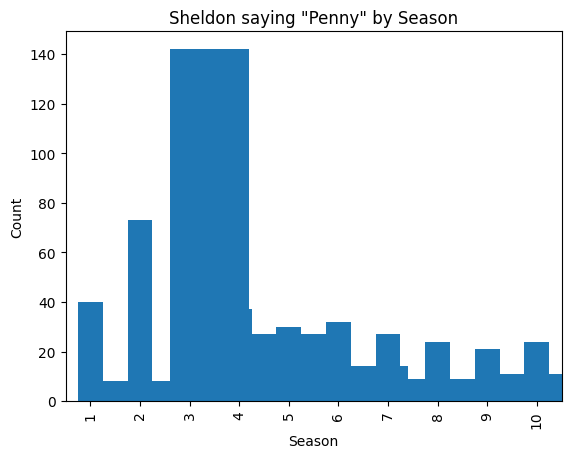

In [2]:
import matplotlib.pyplot as plt

# filter the dataframe to get the rows where speaker is Sheldon and text includes "Penny"
sheldon_penny = df[(df['Speaker'] == 'Sheldon') & (df['Text'].str.contains('Penny'))]

# create a histogram of the locations where Sheldon says "Penny"
# group by Season
sheldon_penny.groupby('Season').count()['Location'].plot(kind='bar')
plt.hist(sheldon_penny['Location'], bins=50)

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Sheldon saying "Penny" by Season')
plt.show()

Usando matplotlib. Representa las localizaciones de la escena en el eje Y y el personaje que habla en el eje X.

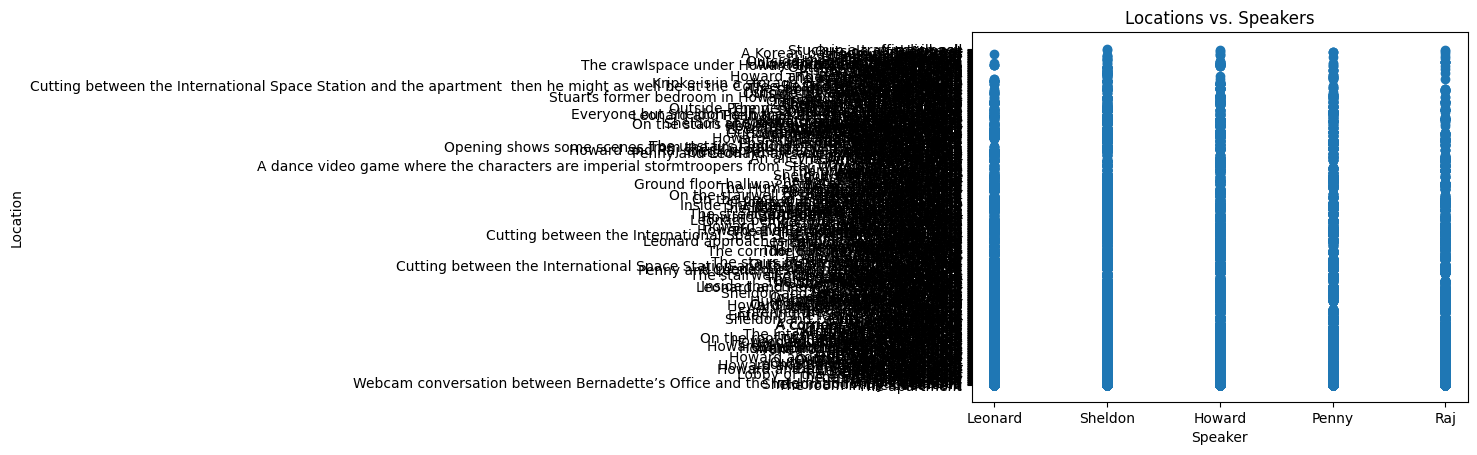

In [3]:
import matplotlib.pyplot as plt

# create a scatter plot of the locations and speakers
df['Speaker'] = df['Speaker'].astype(str)
df['Location'] = df['Location'].astype(str)

plt.scatter(df['Speaker'], df['Location'])
plt.xlabel('Speaker')
plt.ylabel('Location')
plt.title('Locations vs. Speakers')
plt.show()


Agrupa el conjunto de datos por la temporada y el personaje. Para cada grupo genera una columna con el número de veces que se pronuncia la palabra “Penny” y otra columna con un índice para el grupo creado por personaje y temporada (podrías utilizar el método de pandas ngroup). Usando sklearn, realiza una regresión logística que relacione el número de veces que se dice “Penny” en una temporada con el personaje que lo dice

In [4]:
import pandas as pd

from sklearn.linear_model import LogisticRegression

# Convert the column to string
df['Text'] = df['Text'].astype(str)

# Now you can convert to lowercase
#df['Text'] = df['Text'].str.lower()

def count_penny(dialogue):
    return dialogue.lower().count('Penny')

df['Penny_Count'] = df['Text'].apply(count_penny)

grouped = df.groupby(['Season','Speaker']).agg ({'Penny_Count':'sum'})

grouped['Group_Index'] = df.groupby(['Season', 'Speaker']).ngroup()

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model

X = grouped['Group_Index'].values.reshape(-1, 1)
X = X.fillna(0)
y = grouped['Penny_Count']
model.fit(X, y)

# Now the model is trained and you can use it to make predictions

AttributeError: 'numpy.ndarray' object has no attribute 'fillna'